In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc 
import sys 
sys.path.append('../../src')

from spaceoracle.prophets import Prophet

2024-12-06 18:02:26.043776: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/HumanMelanomaRNA.h5ad')

save_dir = '/ix/djishnu/shared/djishnu_kor11/results/melanoma'

pythia = Prophet(
    adata=adata_train,
    models_dir='/ix/djishnu/shared/djishnu_kor11/models_melanoma',
    annot='cluster_cat',
    annot_labels='cluster'
)

In [ ]:
pythia.compute_betas()

In [16]:
import json 

with open('../../data/GSEA_human/h.all.v2024.1.Hs.json', 'r') as f:
    gsea = json.load(f)
set(gsea['HALLMARK_TNFA_SIGNALING_VIA_NFKB']['geneSymbols']) & set(adata_train.var_names)

{'AREG',
 'BTG2',
 'CCL4',
 'CCL5',
 'CCN1',
 'CCRL2',
 'CD69',
 'CXCL10',
 'CXCL11',
 'DUSP2',
 'EFNA1',
 'EGR1',
 'EHD1',
 'GEM',
 'HES1',
 'IL18',
 'IL7R',
 'INHBA',
 'NAMPT',
 'NR4A3',
 'OLR1',
 'PDE4B',
 'PLPP3',
 'SAT1',
 'SERPINE1',
 'SLC16A6',
 'SPSB1',
 'SQSTM1',
 'TLR2',
 'TNC',
 'TNFAIP2',
 'TNFRSF9',
 'TNFSF9'}

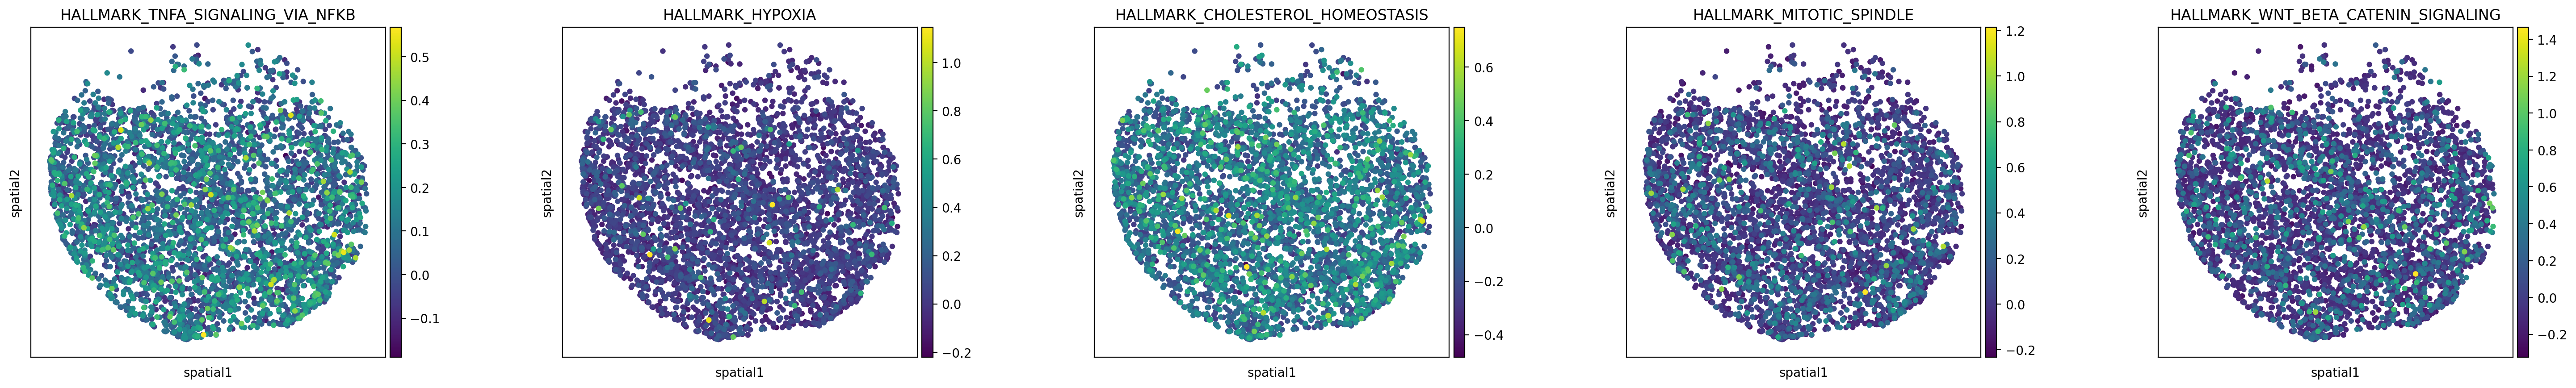

In [4]:
pythia.compute_gsea_scores(savepath=f'{save_dir}/gsea_scores.png')

In [41]:
import numpy as np
x = pythia.adata.obs[pythia.annot].value_counts().head(3).index.astype(str)
x

Index(['2', '10', '7'], dtype='object')

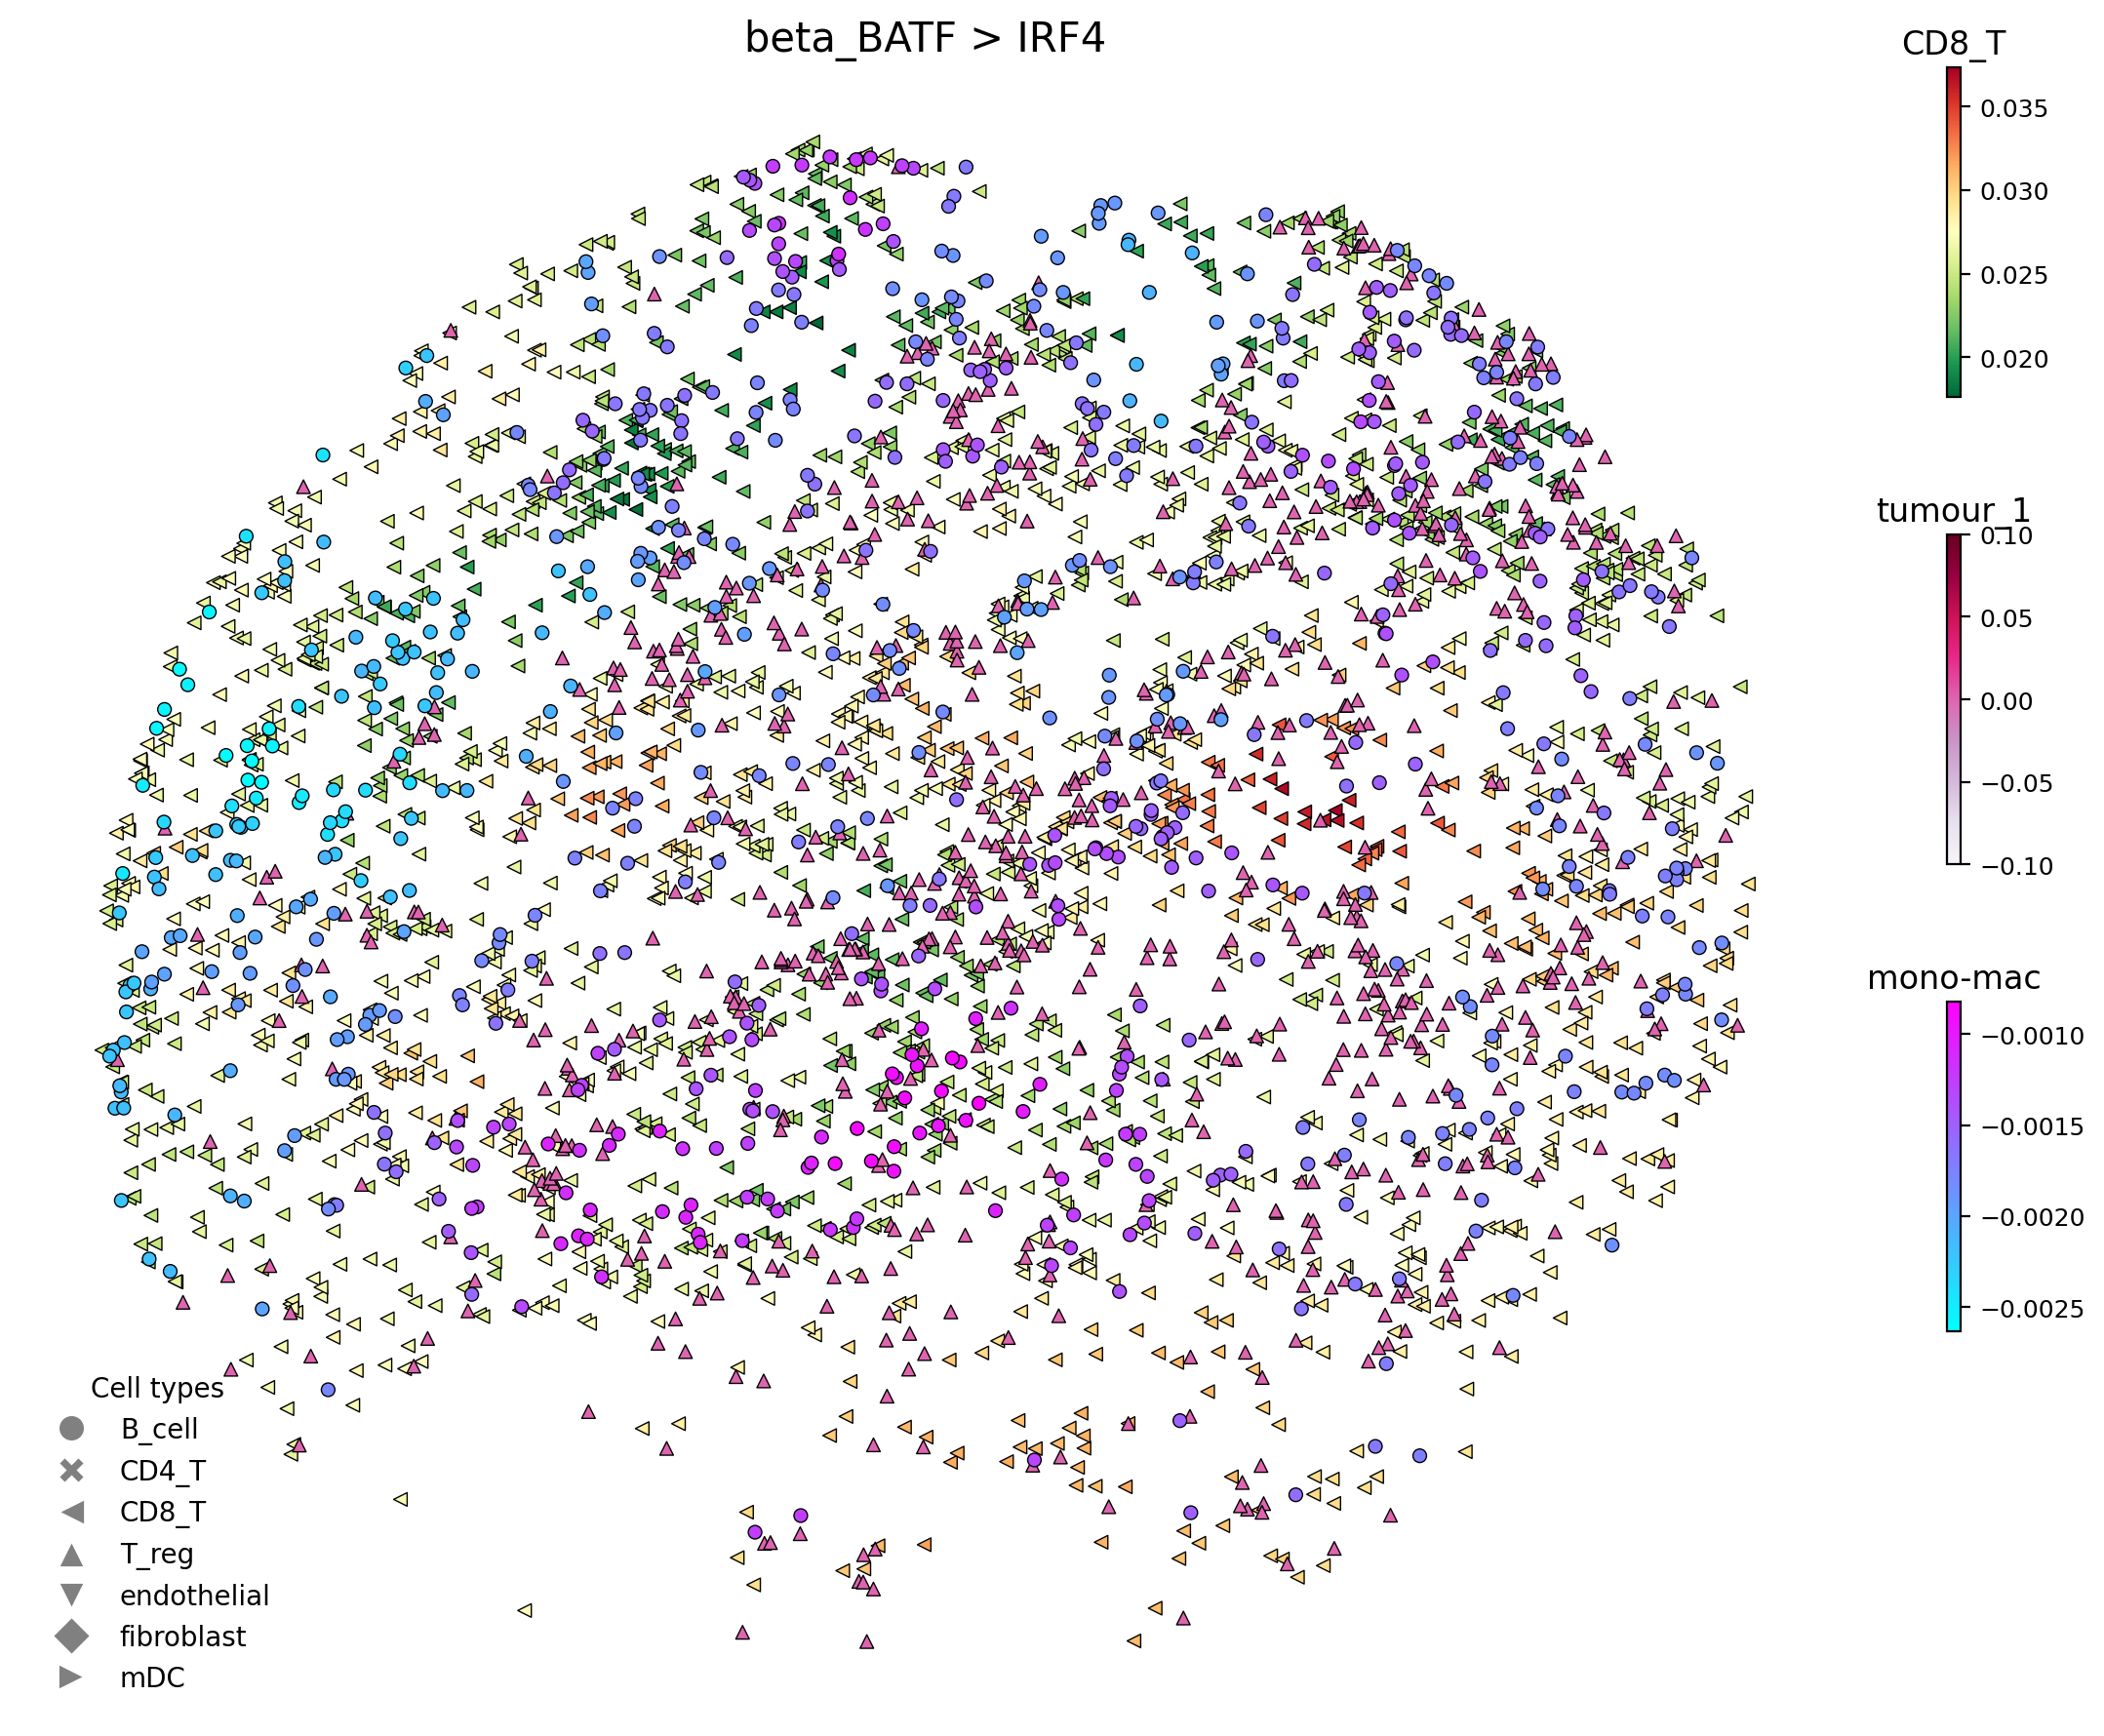

In [ ]:
pythia.plot_beta_map(
    regulator='BATF', 
    target_gene='IRF4',
    save_dir=f'{save_dir}/beta_maps/',
)

In [6]:
# https://www.nature.com/articles/s41586-023-06837-4/figures/3

goi = 'PRDM1'
goi in pythia.adata.var_names

True

In [7]:
pythia.perturb(target=goi, n_propagation=3, gene_expr=0)

Running simulation 3/3: 100%|██████████| 4804/4804 [01:19<00:00, 60.75it/s]


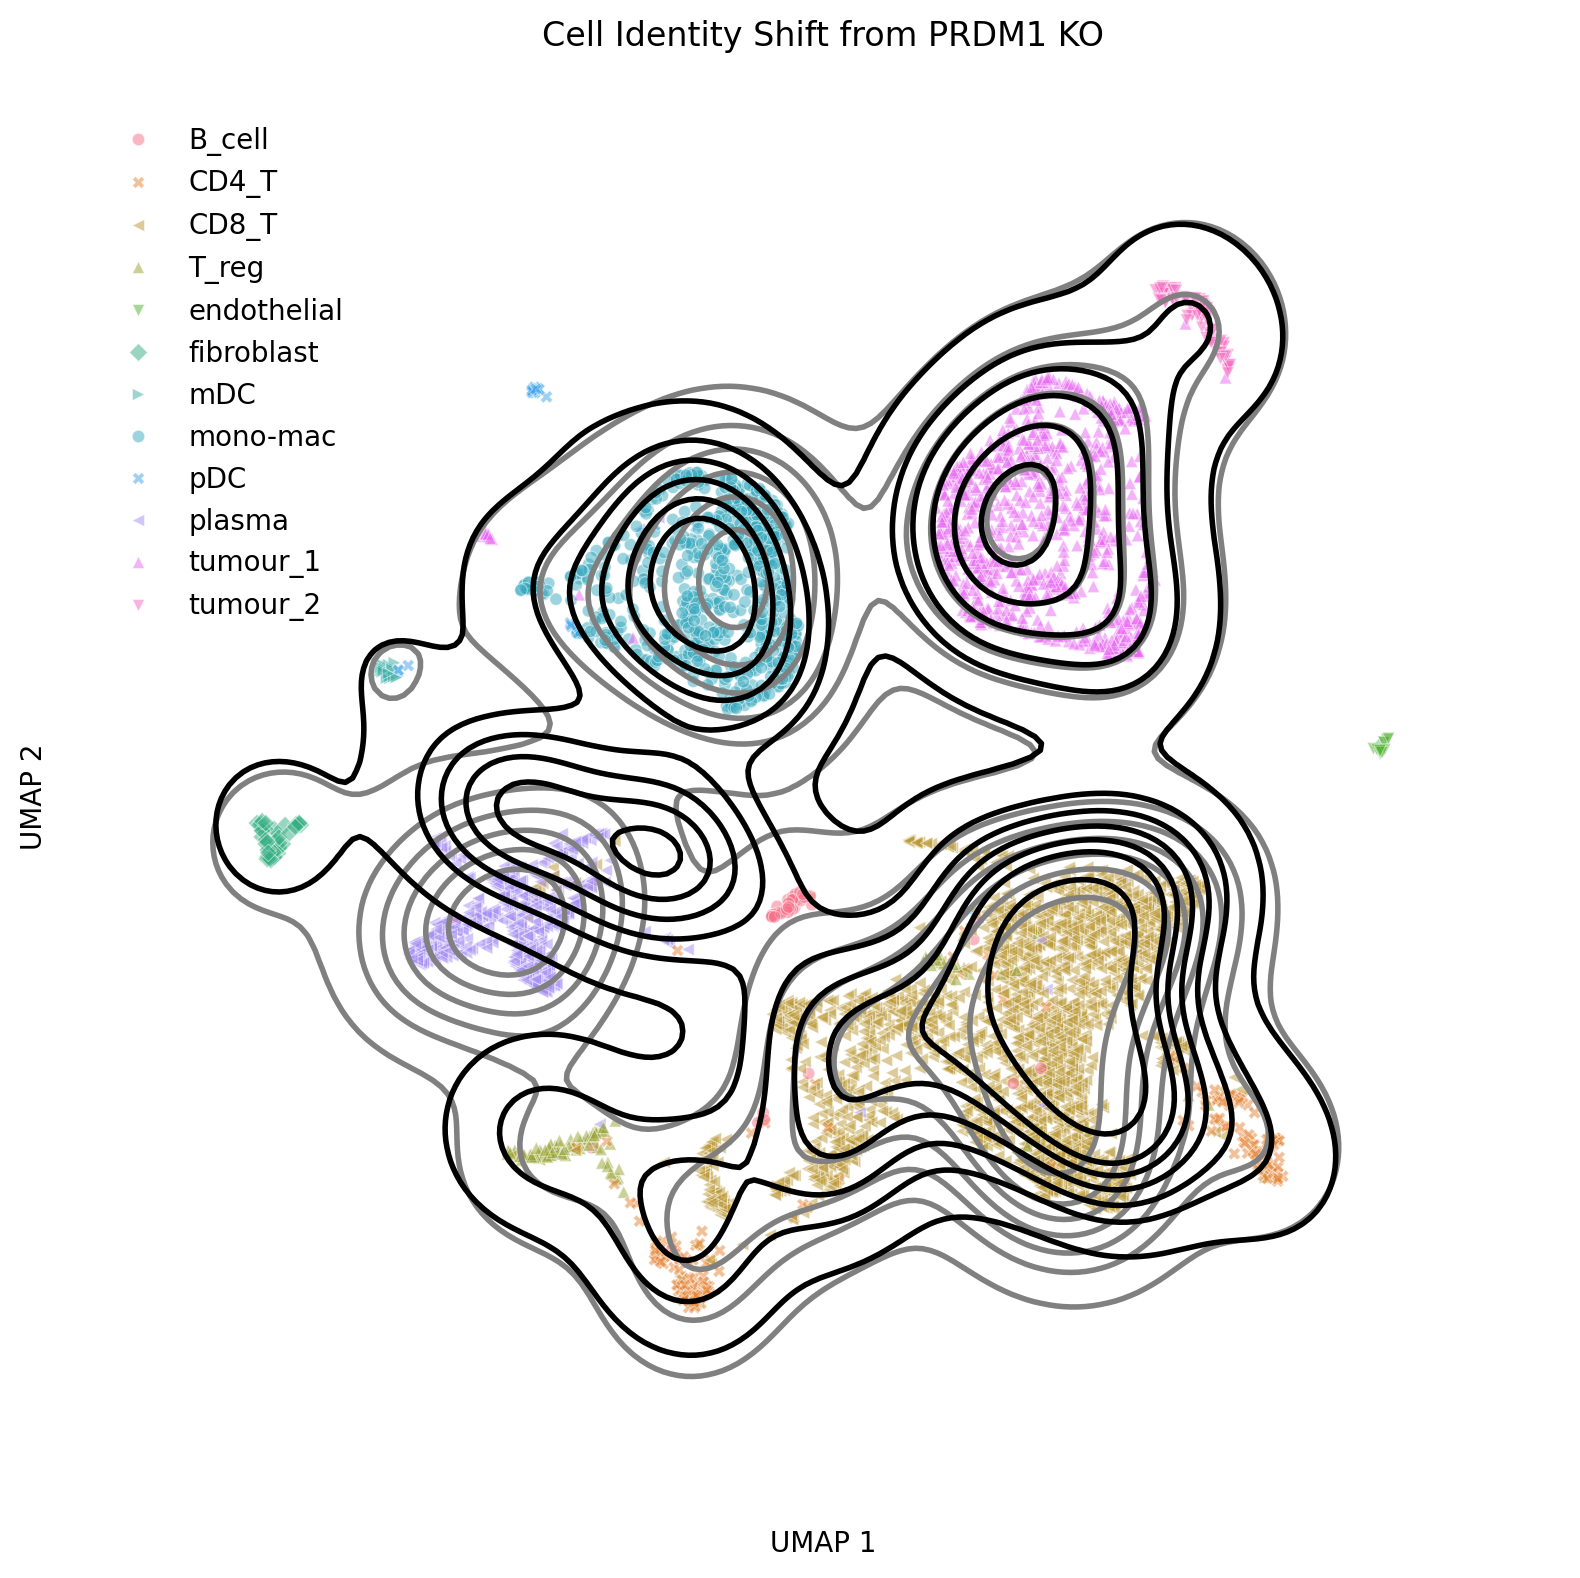

In [8]:
pythia.plot_contour_shift(savepath=f'{save_dir}/{goi}_contour_shift.png')

Ligand interactions: 100%|██████████| 1986/1986 [00:14<00:00, 140.42it/s]


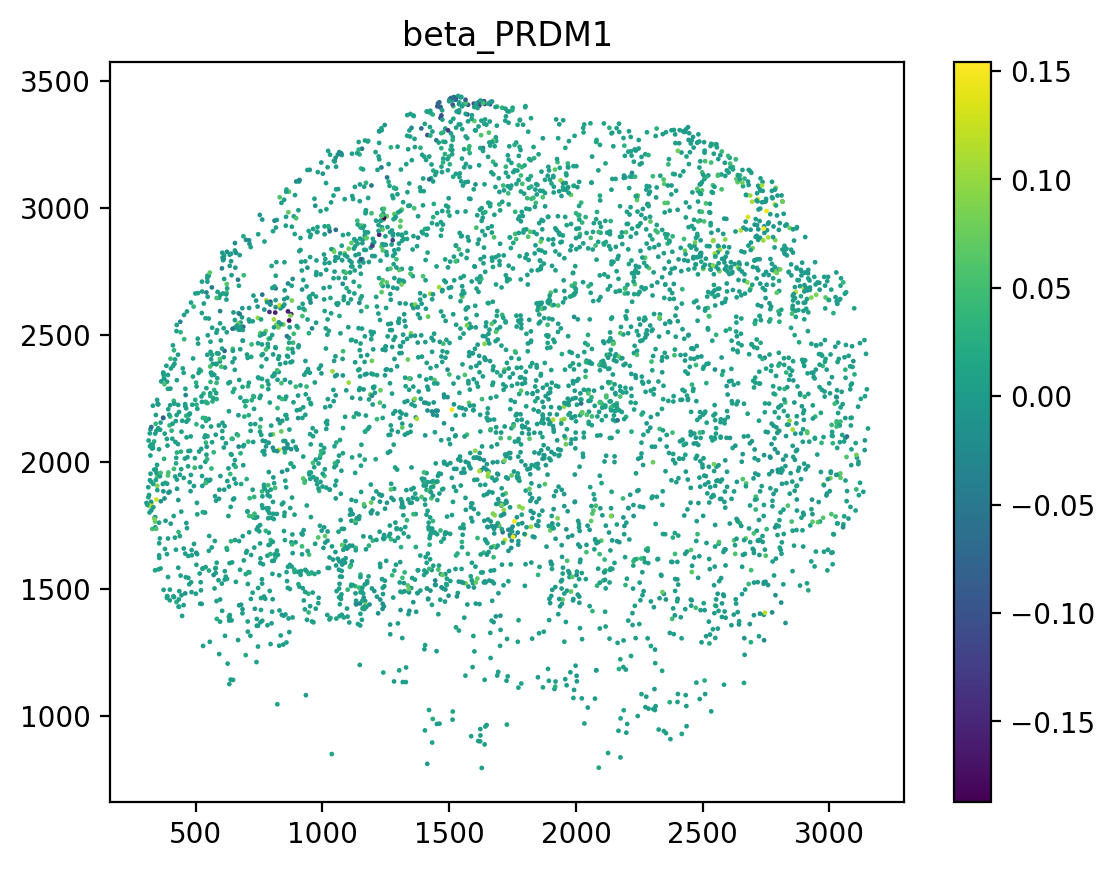

In [46]:
pythia.plot_betas_goi(save_dir=save_dir)

In [49]:
pythia.betas_cache['betas_PRDM1']

CETP_beta_PRDM1  FMN1_beta_PRDM1  LINC01229_beta_PRDM1  \
NAME                                                                         
AAACCCACAACTGGTT-1        -0.026170        -0.003475          4.207390e-02   
AAACCCACATCTCCCA-1         0.000000        -0.002412         -4.646720e-07   
AAACCCACATGCAGCC-1        -0.034038         0.000294          2.252002e-01   
AAACCCAGTCTTACTT-1        -0.027160         0.011478          6.606753e-02   
AAACCCATCACCTTGC-1        -0.009937        -0.001184          3.536258e-02   
...                             ...              ...                   ...   
TTTGTTGAGACCAGCA-1        -0.014025         0.001493          8.582445e-03   
TTTGTTGAGAGTCTGG-1        -0.025403        -0.004591          4.177131e-02   
TTTGTTGCATAGGAGC-1        -0.020508         0.006224          3.770020e-02   
TTTGTTGGTAGTTACC-1        -0.024017         0.001150          6.108983e-03   
TTTGTTGTCTCCCTAG-1         0.000000        -0.002675         -9.064504e-07   

                    KIF2C_beta_PRDM1  SMNDC1_beta_PRDM1  MMRN1_beta_PRDM1  \
NAME                                                                        
AAACCCACAACTGGTT-1          0.008422           0.009251          0.001806   
AAACCCACATCTCCCA-1         -0.365199           0.000000          0.000018   
AAACCCACATGCAGCC-1         -0.000091           0.008354          0.001028   
AAACCCAGTCTTACTT-1          0.007635           0.023798          0.006476   
AAACCCATCACCTTGC-1         -0.002945           0.007988          0.001388   
...                              ...                ...               ...   
TTTGTTGAGACCAGCA-1          0.007843           0.001159          0.000250   
TTTGTTGAGAGTCTGG-1          0.006184           0.013955          0.002258   
TTTGTTGCATAGGAGC-1          0.007791           0.011835          0.003348   
TTTGTTGGTAGTTACC-1          0.005538           0.007622          0.001358   
TTTGTTGTCTCCCTAG-1         -0.059417           0.000000          0.000003   

                    KIF21A_beta_PRDM1  MZB1_beta_PRDM1  ZNF880_beta_PRDM1  \
NAME                                                                        
AAACCCACAACTGGTT-1           0.132230         0.000066          -0.005442   
AAACCCACATCTCCCA-1           0.000000         0.032842           0.000000   
AAACCCACATGCAGCC-1          -0.399914         0.032616          -0.037765   
AAACCCAGTCTTACTT-1           0.356095         0.000043          -0.017425   
AAACCCATCACCTTGC-1           0.002478        -0.000219           0.001458   
...                               ...              ...                ...   
TTTGTTGAGACCAGCA-1           0.046609         0.000070          -0.000567   
TTTGTTGAGAGTCTGG-1           0.225687         0.000063          -0.012893   
TTTGTTGCATAGGAGC-1           0.164481         0.000048          -0.005980   
TTTGTTGGTAGTTACC-1           0.086875         0.000045          -0.003092   
TTTGTTGTCTCCCTAG-1           0.000000         0.003966           0.000000   

                    ISOC1_beta_PRDM1  ...  LINC01414_beta_PRDM1  \
NAME                                  ...                         
AAACCCACAACTGGTT-1          0.002215  ...             -0.002869   
AAACCCACATCTCCCA-1          0.000005  ...              0.002919   
AAACCCACATGCAGCC-1          0.038248  ...              0.007061   
AAACCCAGTCTTACTT-1          0.005555  ...             -0.010660   
AAACCCATCACCTTGC-1          0.011979  ...             -0.002829   
...                              ...  ...                   ...   
TTTGTTGAGACCAGCA-1          0.000780  ...             -0.000820   
TTTGTTGAGAGTCTGG-1          0.004132  ...             -0.005977   
TTTGTTGCATAGGAGC-1          0.002575  ...             -0.005017   
TTTGTTGGTAGTTACC-1          0.001598  ...             -0.002285   
TTTGTTGTCTCCCTAG-1          0.000006  ...              0.000477   

                    TSTD1_beta_PRDM1  B3GAT2_beta_PRDM1  DRD4_beta_PRDM1  \
NAME                                                 